In [1]:
# Imports and boilerplate to make graphs look better
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import wave
from IPython.display import Audio

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

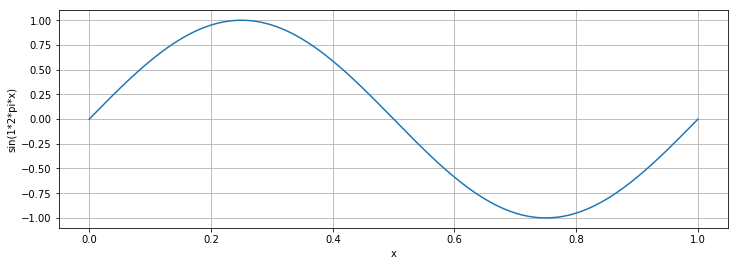

In [19]:
x = np.linspace(0, 1, 1000)
n1 = np.sin(1 * 2*np.pi*x)
setup_graph(title='', x_label='x', y_label='sin(1*2*pi*x)', fig_size=(12,4))
plt.grid(True)
plt.plot(x, n1)
plt.show()

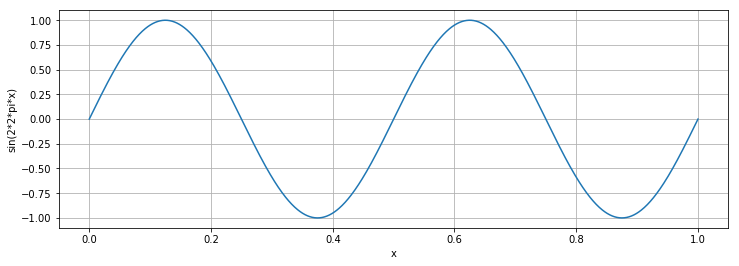

In [20]:
n2 = np.sin(2 * 2*np.pi*x)
setup_graph(title='', x_label='x', y_label='sin(2*2*pi*x)', fig_size=(12,4))
plt.grid(True)
plt.plot(x, n2)
plt.show()

How is the number represented by these waves? It should be proportional to the energy in the wave...

In [84]:
integrate.quad(lambda x: abs((np.pi/2) * np.sin(1 * 2*np.pi*x)), 0, 1)

(1.0, 1.1102230246251565e-14)

In [83]:
integrate.quad(lambda x: abs((np.pi/2) * np.sin(2 * 2*np.pi*x)), 0, 1)

(1.0, 1.1074474670635936e-14)

The energy is proportional to the frequency, so even though the area is the same (corresponding to amplitude), the actual energy should be `Amplitude * Frequency`. So `1 * 2`. How does this work with composite numbers?

`6 = 3 * 2 = (3*1) + (2*1)`

So in theory, a number represented as a wave could be factored via FFT (just look for the components, which correspond to primes).

Is deconvolution quickly feasible?

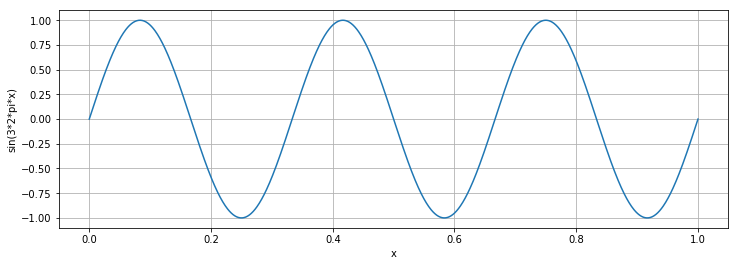

In [21]:
n3 = np.sin(3 * 2*np.pi*x)
setup_graph(title='', x_label='x', y_label='sin(3*2*pi*x)', fig_size=(12,4))
plt.grid(True)
plt.plot(x, n3)
plt.show()

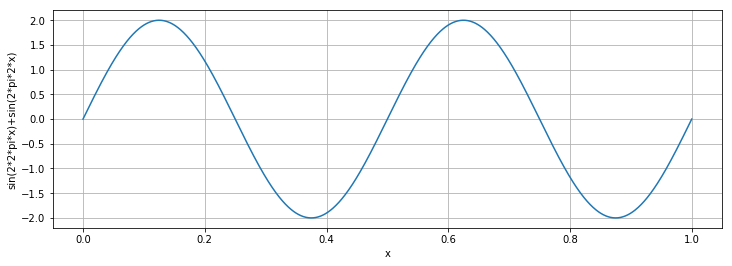

In [23]:
n4 = np.sin(2 * 2*np.pi*x) + np.sin(2 * 2*np.pi*x)
setup_graph(title='', x_label='x', y_label='sin(2*2*pi*x)+sin(2*pi*2*x)', fig_size=(12,4))
plt.grid(True)
plt.plot(x, n4)
plt.show()

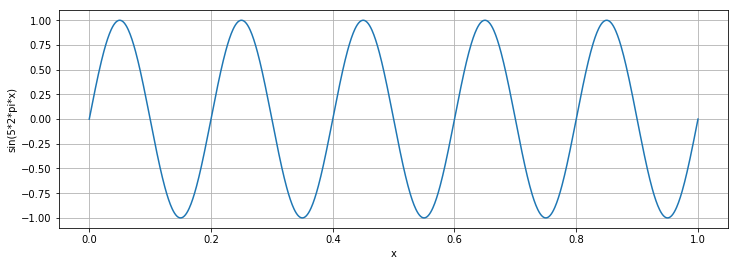

In [24]:
n5 = np.sin(5 * 2*np.pi*x)
setup_graph(title='', x_label='x', y_label='sin(5*2*pi*x)', fig_size=(12,4))
plt.grid(True)
plt.plot(x, n5)
plt.show()

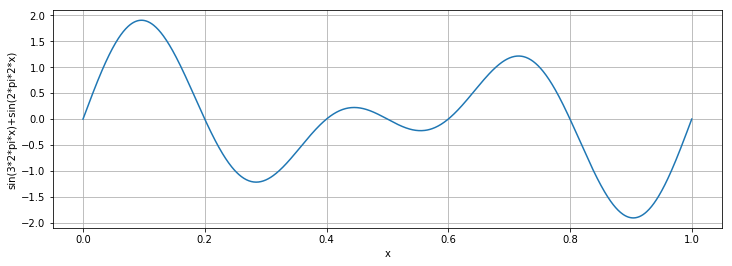

In [25]:
n6 = np.sin(3 * 2*np.pi*x) + np.sin(2 * 2*np.pi*x)
setup_graph(title='', x_label='x', y_label='sin(3*2*pi*x)+sin(2*pi*2*x)', fig_size=(12,4))
plt.grid(True)
plt.plot(x, n6)
plt.show()

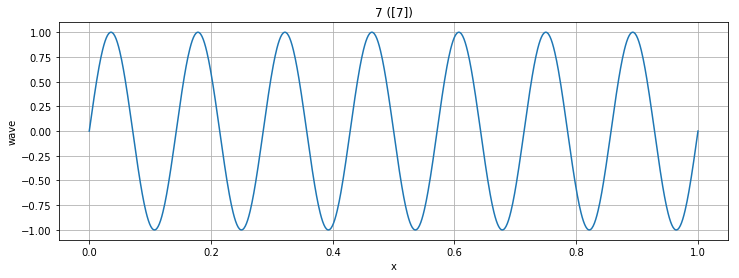

In [26]:
def graph_num_as_wave(num, factors):
    x = np.linspace(0, 1, 1000)
    component_waves = [np.sin(component * 2*np.pi*x) for component in factors]
    num_wave = sum(component_waves)
    setup_graph(title='{} ({})'.format(num, factors), x_label='x', y_label='wave', fig_size=(12,4))
    plt.grid(True)
    plt.plot(x, num_wave)
    plt.show()

graph_num_as_wave(7, [7])

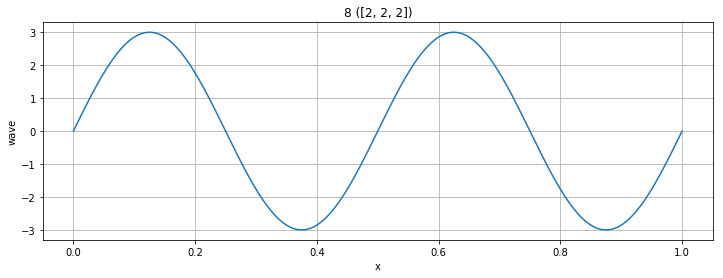

In [27]:
graph_num_as_wave(8, [2, 2, 2])

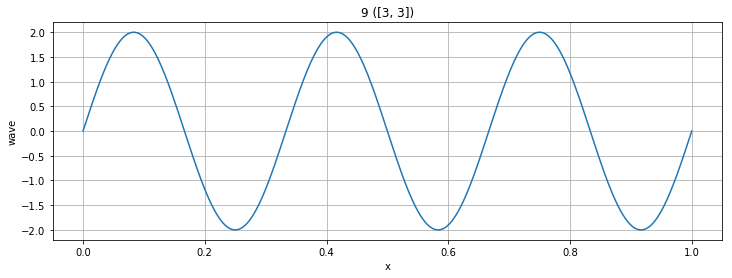

In [28]:
graph_num_as_wave(9, [3, 3])

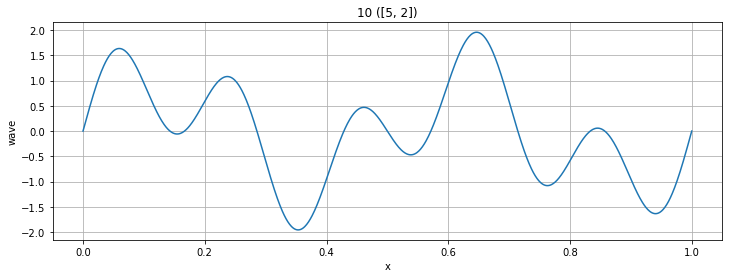

In [29]:
graph_num_as_wave(10, [5, 2])

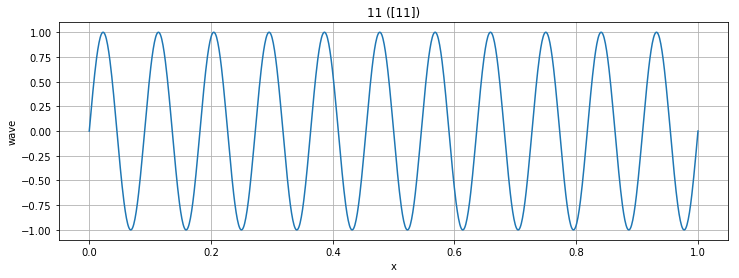

In [30]:
graph_num_as_wave(11, [11])

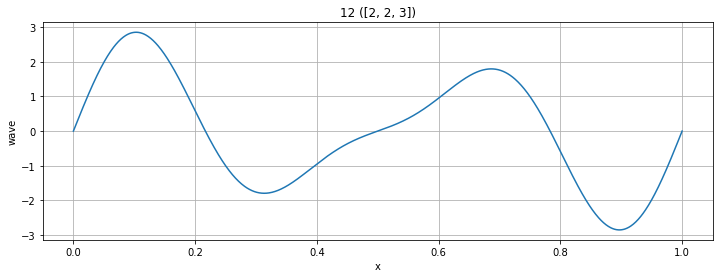

In [31]:
graph_num_as_wave(12, [2, 2, 3])

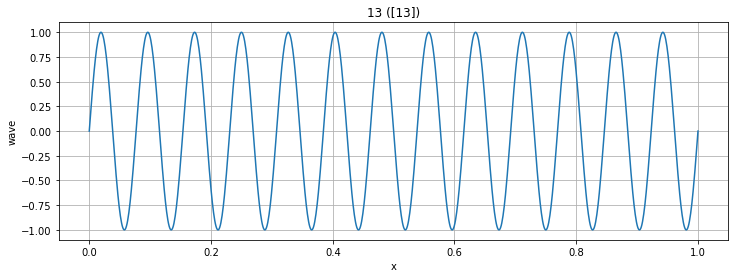

In [32]:
graph_num_as_wave(13, [13])

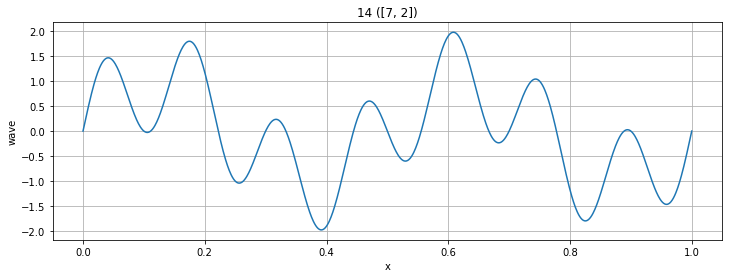

In [33]:
graph_num_as_wave(14, [7, 2])

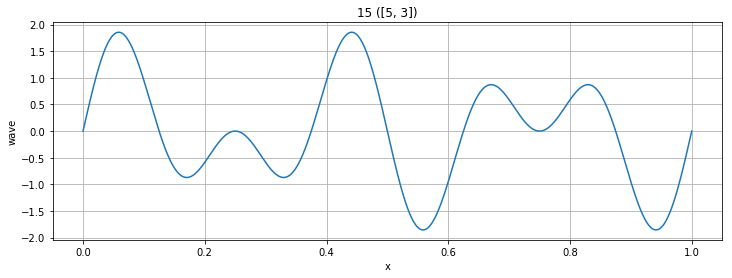

In [34]:
graph_num_as_wave(15, [5, 3])

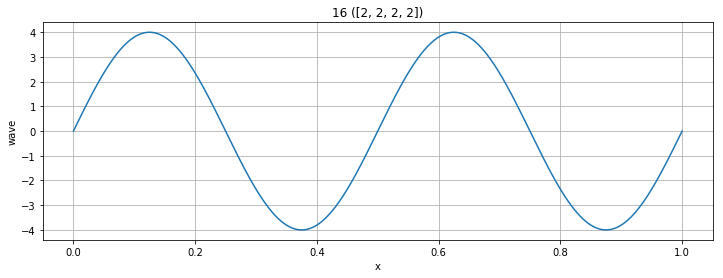

In [35]:
graph_num_as_wave(16, [2, 2, 2, 2])

Note that the value is the frequency raised to the amplitude. So in this case, `2^4`.

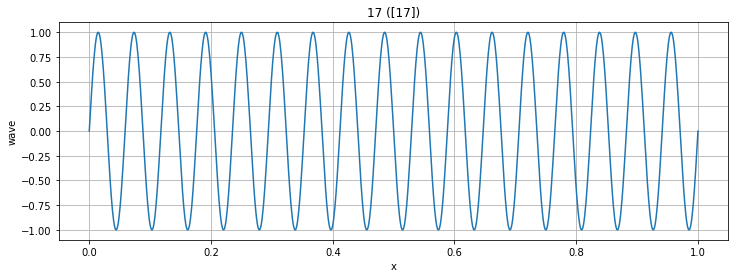

In [36]:
graph_num_as_wave(17, [17])

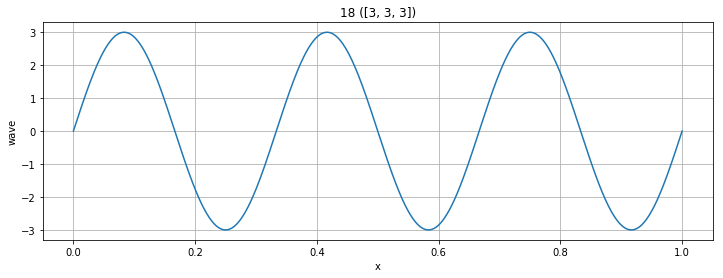

In [37]:
graph_num_as_wave(18, [3, 3, 3])

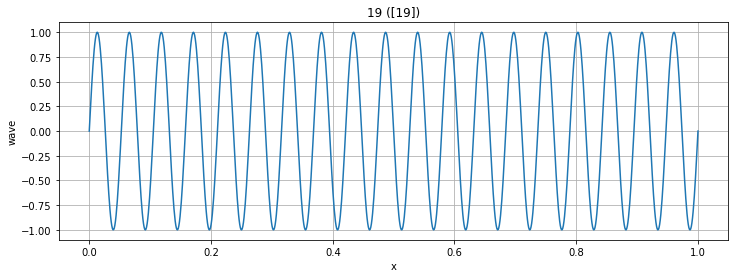

In [38]:
graph_num_as_wave(19, [19])

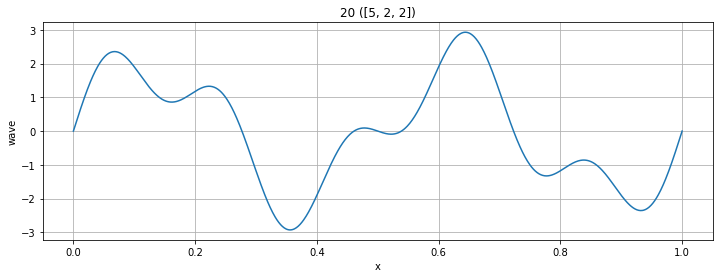

In [39]:
graph_num_as_wave(20, [5, 2, 2])

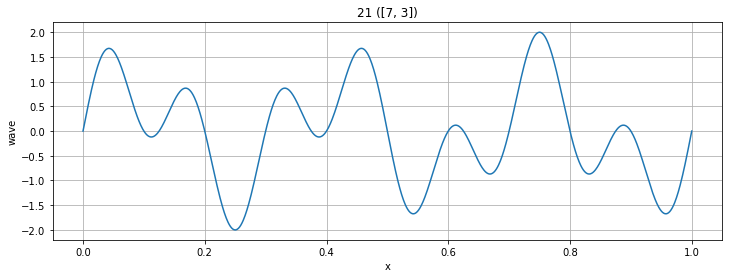

In [40]:
graph_num_as_wave(21, [7, 3])

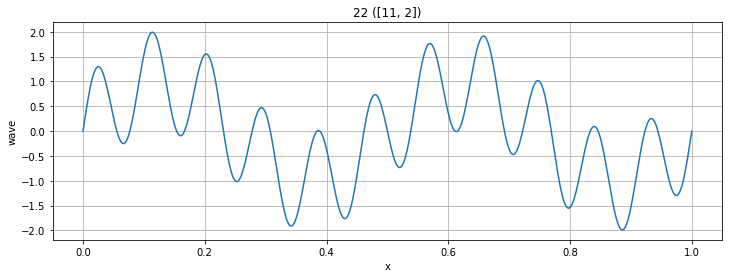

In [41]:
graph_num_as_wave(22, [11, 2])

What do numbers with more prime components look like?

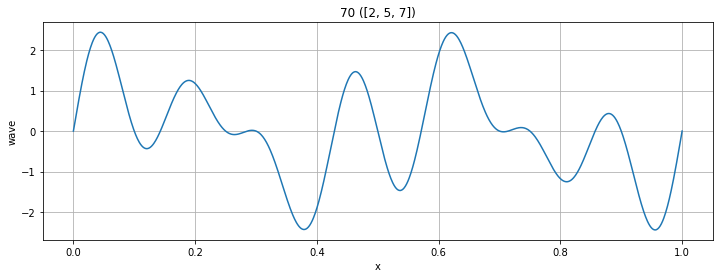

In [42]:
graph_num_as_wave(2*5*7, [2, 5, 7])

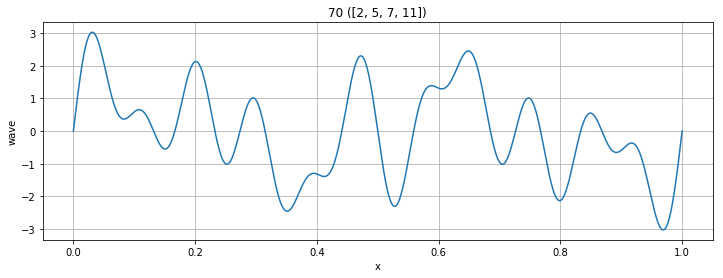

In [43]:
graph_num_as_wave(2*5*7, [2, 5, 7, 11])

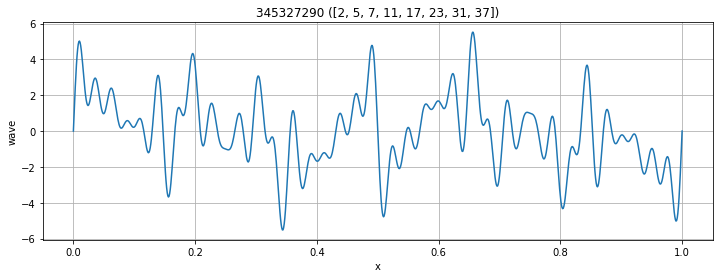

In [95]:
graph_num_as_wave(2*5*7*11*17*23*31*37, [2, 5, 7, 11, 17, 23, 31, 37])

Cool, so it looks like numbers can be represented very well as simple waves, where primes are pure frequencies (as are primes raised to some power), but other composite numbers are non-pure sine waves.

The next question is, can we go from a number to its wave representation without factoring? And if we have its wave representation, can we factor it?

What if there was some sort of gradient descent-like algorithm to automatically "tune in" to the composite waveform that is the product of couple primes? (This is obviously interesting from a cryptographic perspective).
* If a number is written as this convolution of pure prime sine waves, factorization should be as simple as "tuning in" to a resonante component frequency. So the question is: is there a function to convert from any composite number N to one of these sine waveforms?

What if we are trying to factor 5*7?

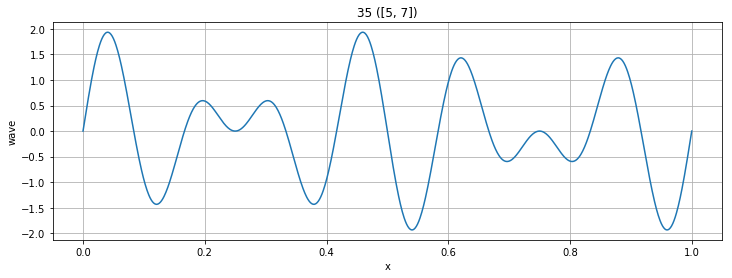

In [99]:
graph_num_as_wave(5*7, [5, 7])

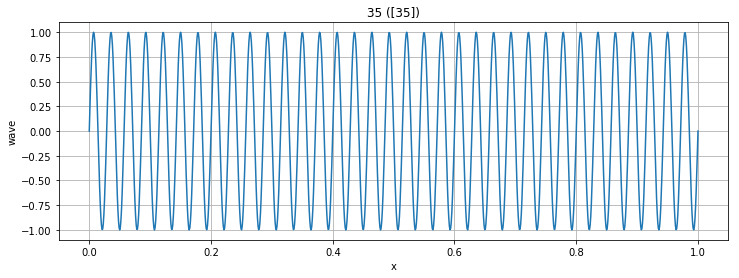

In [119]:
graph_num_as_wave(35, [35])

Do other near-by values look similar?

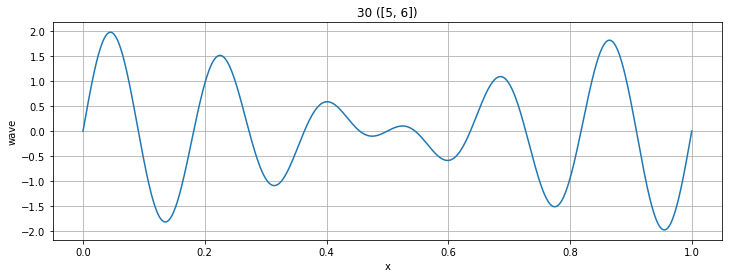

In [102]:
graph_num_as_wave(5*6, [5, 6])

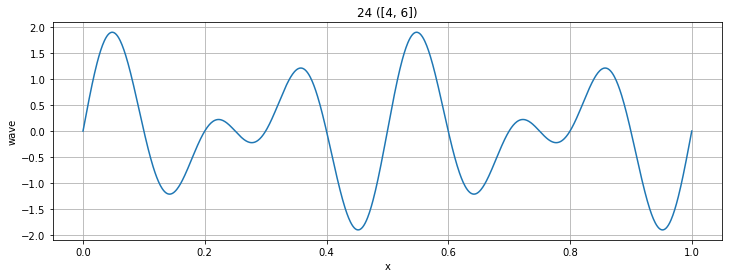

In [103]:
graph_num_as_wave(4*6, [4, 6])

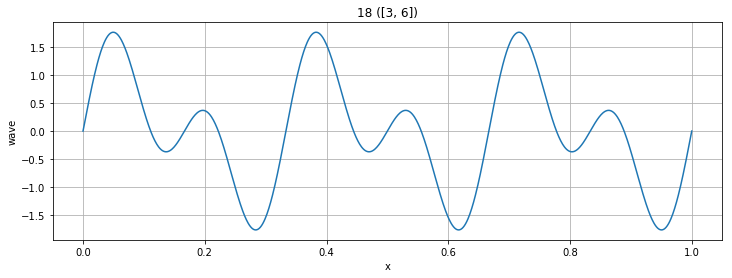

In [104]:
graph_num_as_wave(3*6, [3, 6])

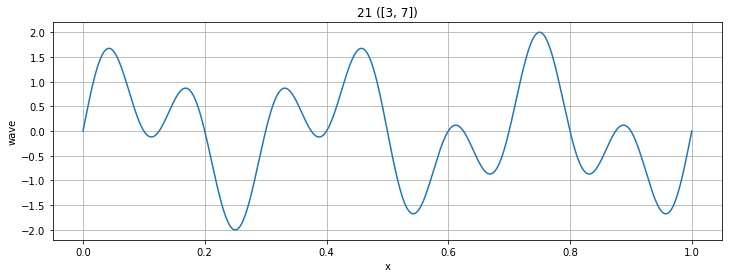

In [105]:
graph_num_as_wave(3*7, [3, 7])

Ya, they look pretty close.

In [107]:
1

1

## Other notes

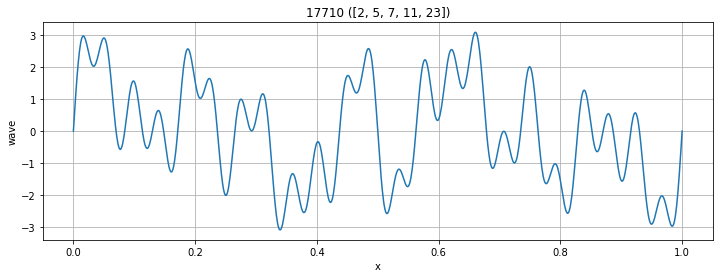

In [108]:
graph_num_as_wave(2*5*7*11*23, [2, 5, 7, 11, 23])

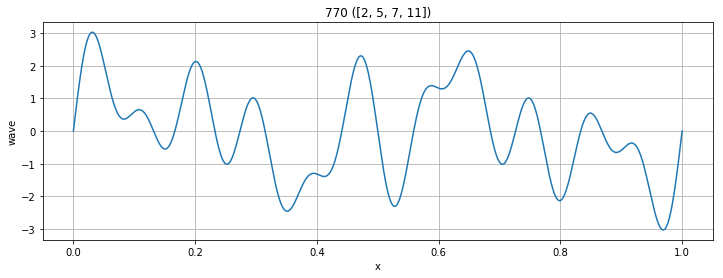

In [109]:
# 23 peaks, take away the 23 component:
graph_num_as_wave(2*5*7*11, [2, 5, 7, 11])

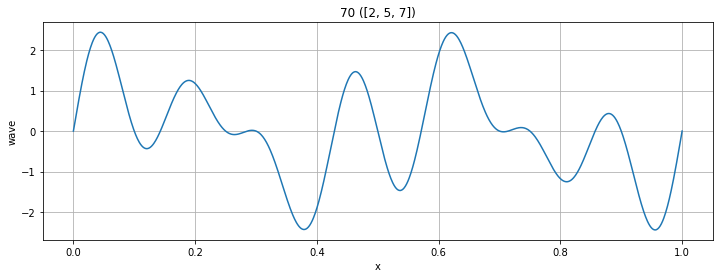

In [110]:
# 11 peaks, take away the 11 component:
graph_num_as_wave(2*5*7, [2, 5, 7])

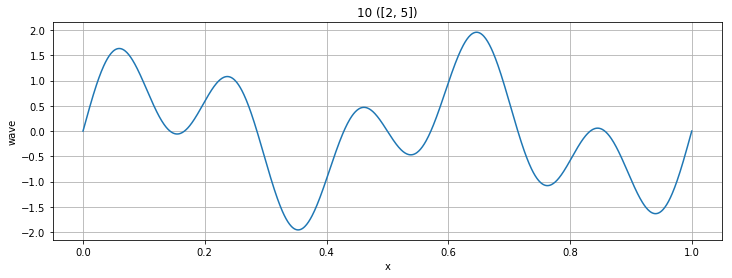

In [111]:
# 7 peaks, take away the 7 component:
graph_num_as_wave(2*5, [2, 5])

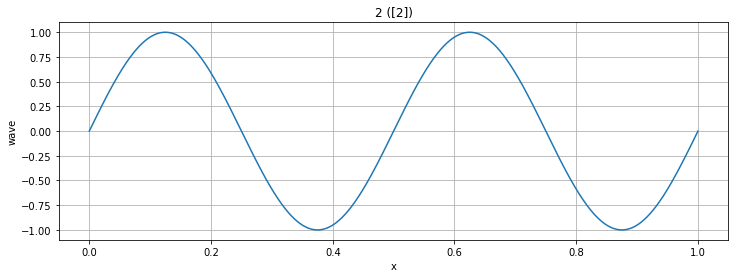

In [112]:
# 5 peaks, take away the 5 component:
graph_num_as_wave(2, [2])

Only 2 peaks remaining, and it's a pure sine wave. So I just visually factored 17710 by looking at graph peaks...

That seems like it could be a factoring trick, except that the graph is a convolution of primes. But how can I draw a graph for an arbitrary number without factoring?

Is there some reason, from a wave dynamics perspective, why prime numbers would represent pure sine waves? With sine waves, any 2 waves of differing frequency are orthogonal, so maybe this is just me converting from one set of orthogonal objects (prime numbers in R) to a superset of orthogonal objects (waves)?

In [118]:
x = np.linspace(0, 1, 1000)
n35 = np.sin(5 * 2*np.pi*x) + np.sin(7 * 2*np.pi*x)
n35_2 = np.sin(35 * 2*np.pi*x)
np.dot(n35, n35_2)

1.4484333871189747e-13

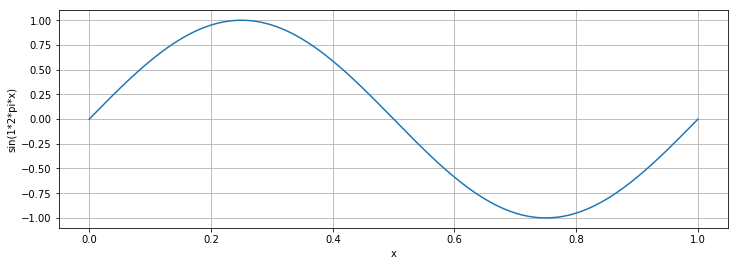

In [120]:
x = np.linspace(0, 1, 1000)
n1 = np.sin(1 * 2*np.pi*x)
setup_graph(title='', x_label='x', y_label='sin(1*2*pi*x)', fig_size=(12,4))
plt.grid(True)
plt.plot(x, n1)
plt.show()

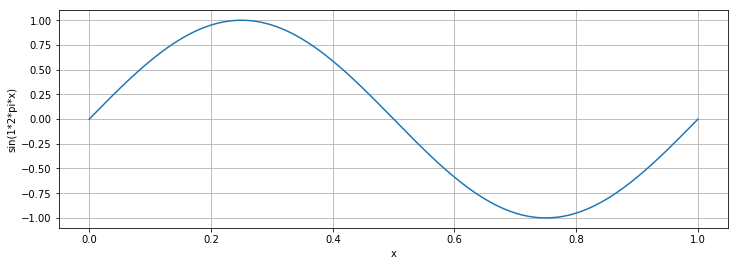

In [125]:
x = np.linspace(0, 1, 1000)
n1 = np.sin(1 * 2*np.pi*x)
setup_graph(title='', x_label='x', y_label='sin(1*2*pi*x)', fig_size=(12,4))
plt.grid(True)
plt.plot(x, n1)
plt.show()

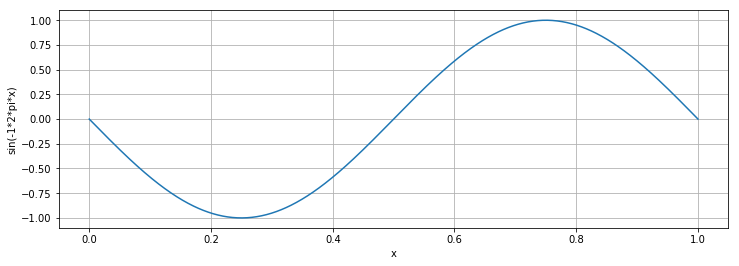

In [128]:
x = np.linspace(0, 1, 1000)
nn1 = np.sin(-1 * 2*np.pi*x)
setup_graph(title='', x_label='x', y_label='sin(-1*2*pi*x)', fig_size=(12,4))
plt.grid(True)
plt.plot(x, nn1)
plt.show()

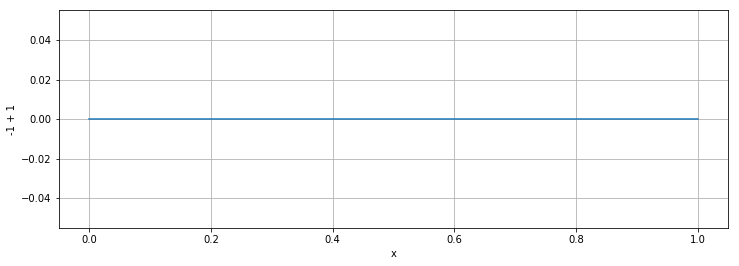

In [129]:
x = np.linspace(0, 1, 1000)
nn1 = np.sin(-1 * 2*np.pi*x)
setup_graph(title='', x_label='x', y_label='-1 + 1', fig_size=(12,4))
plt.grid(True)
plt.plot(x, n1 + nn1)
plt.show()

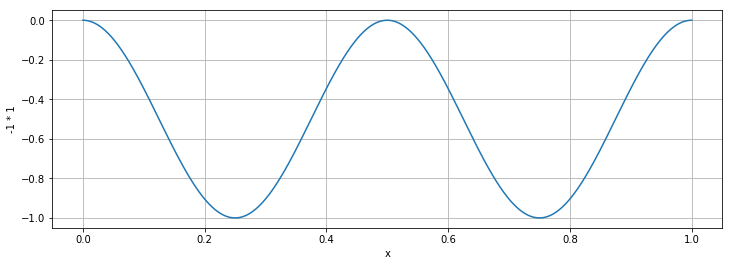

In [131]:
x = np.linspace(0, 1, 1000)
nn1 = np.sin(-1 * 2*np.pi*x)
setup_graph(title='', x_label='x', y_label='-1 * 1', fig_size=(12,4))
plt.grid(True)
plt.plot(x, n1 * nn1)
plt.show()

In [135]:
np.array([1,2,3]) * np.array([10, 100, 1000])

array([  10,  200, 3000])

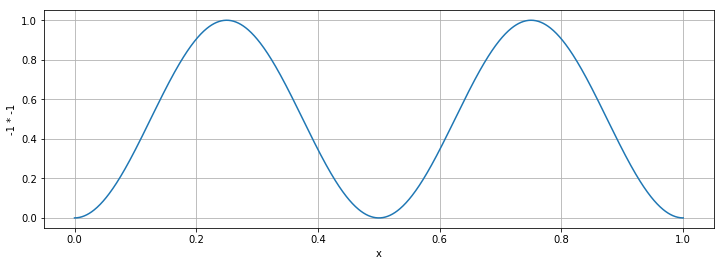

In [138]:
x = np.linspace(0, 1, 1000)
nn1 = np.sin(-1 * 2*np.pi*x)
setup_graph(title='', x_label='x', y_label='-1 * -1', fig_size=(12,4))
plt.grid(True)
plt.plot(x, nn1 * nn1)
plt.show()

Let's see if we can hear what these different numbers sounds like in these wave representations...

Human hearing starts 20Hz. So if I have a wave that represents "1", I suppose that should come out to about 20Hz. If I do a 1-second audio sample, and I'm generating 1000 data points per oscillation, that would be about 20k samples per second, which happens to be pretty good, since 44100Hz is the common sample rate.

In [139]:
import scipy.io.wavfile
def write_audio_file(filename, filedata, sample_rate):
    scipy.io.wavfile.write(filename, sample_rate, filedata)

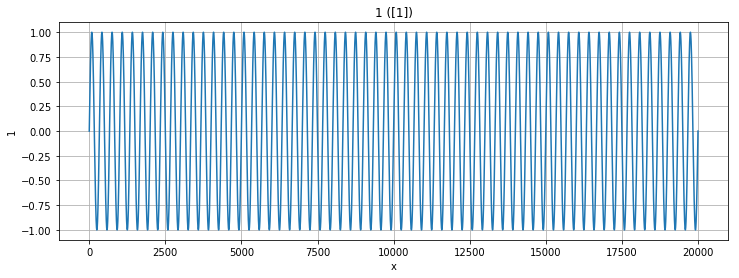

In [175]:
def gen_wave(factors, repeat_num=100):
    x = np.linspace(0, 1, 1000)
    component_waves = [np.sin(component * 2*np.pi*x) for component in factors]
    num_wave = np.array(sum(component_waves))
    num_wave_repeated = np.array([])
    for i in range(repeat_num):
        num_wave_repeated = np.append(num_wave_repeated, num_wave)
    return num_wave_repeated

w = gen_wave([3], repeat_num=20)
setup_graph(title='{} ({})'.format(1, [1]), x_label='x', y_label='1', fig_size=(12,4))
plt.grid(True)
plt.plot(range(len(w)), w)
plt.show()
write_audio_file('n1.wav', w, 50*1000)

In [176]:
def audio_numbers(numbers_by_factors, repeat_num=20):
    combined = np.array([])
    for factors in numbers_by_factors:
        w = gen_wave(factors, repeat_num=repeat_num)
        combined = np.append(combined, w)
    return combined

def out_audio_numbers(numbers_by_factors, filename='n.wav', repeat_num=20, sample_rate=50*1000):
    combined = audio_numbers(numbers_by_factors, repeat_num=repeat_num)
    write_audio_file(filename, combined, sample_rate)

In [180]:
out_audio_numbers([[1], [2], [3], [2, 2], [5], [2, 3], [7], [2, 2, 2], [3, 3], [2, 5], 
                   [11], [2, 2, 3], [13], [2, 7], [3, 5], [2, 2, 2, 2], [17], [3, 3, 2], [19], [5, 2, 2],
                   [7, 3], [11, 2], [23], [2, 2, 2, 3], [5, 5], [13, 2], [3, 3, 3], [2, 2, 7], [29], [3, 2, 5],
                   [31], [2, 2, 2, 2, 2], [3, 11], [2, 17], [5, 7], [2, 2, 3, 3], [37], [2, 19], [3, 13], [2, 2, 2, 5]])

In [184]:
primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199]
out_audio_numbers([[p] for p in primes], filename='primes.wav')

In [189]:
def prime_factors(n):
    """Lazily stolen from https://stackoverflow.com/questions/15347174/python-finding-prime-factors"""
    i = 2
    factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors

In [188]:
prime_factors(20)

[2, 2, 5]

In [190]:
out_audio_numbers([prime_factors(i) for i in range(200)])

In [195]:
def prime_factors(n):
    """Lazily stolen from https://stackoverflow.com/questions/15347174/python-finding-prime-factors"""
    i = 2
    factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors

def gen_wave(factors, repeat_num=100, samples=44100):
    """1Hz wave will generate a 100Hz wave"""
    x = np.linspace(0, repeat_num, samples)
    component_waves = [np.sin(component * 2*np.pi*x) for component in factors]
    num_wave = np.array(sum(component_waves))
    return num_wave

def audio_numbers(numbers_by_factors, repeat_num=20):
    combined = np.array([])
    for factors in numbers_by_factors:
        w = gen_wave(factors, repeat_num=repeat_num)
        combined = np.append(combined, w)
    return combined

def out_audio_numbers(numbers_by_factors, filename='n.wav', repeat_num=20, sample_rate=50*1000):
    combined = audio_numbers(numbers_by_factors, repeat_num=repeat_num)
    write_audio_file(filename, combined, sample_rate)

In [196]:
out_audio_numbers([prime_factors(i) for i in range(2000)], filename='numbers_to_200.wav')